# Mallet

In [1]:
from dariah_topics import mallet as mal
from dariah_topics import visualization as visual

In [12]:
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/traitlets/traitlets.py:809: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new (traitlets 4.1) @observe(change) API
  clsname, change_or_name), DeprecationWarning)
/usr/lib/python3.4/importlib/_bootstrap.py:321: DeprecationWarning: `IPython.lib.inputhook` is deprecated since IPython 5.0 and will be removed in future versions.
  return f(*args, **kwds)
/usr/local/lib/python3.4/dist-packages/IPython/lib/inputhook.py:327: DeprecationWarning: `register` is deprecated since IPython 5.0 and will be removed in future versions.
  @inputhook_manager.register('osx')
/usr/local/lib/python3.4/dist-packages/IPython/lib/inputhook.py:336: DeprecationWarning: `register` is deprecated since IPython 5.0 and will be removed in future versions.
  @inputhook_manager.register('wx')
/usr/local/lib/python3.4/dist-packages/IPython/lib/inputhook.py:398: DeprecationWarning: `register` is deprecated since IPython 5.0 and will be removed in futu

In [2]:
path_to_mallet = "/home/steffen/Software/mallet/bin/mallet"

In [ ]:
#outfolder = "tutorial_supplementals/mallet_output"

In [3]:
path_to_corpus = "corpus_txt"

In [4]:
#mallet_model = mal.create_mallet_model(path_to_mallet=path_to_mallet, outfolder = outfolder, path_to_corpus=path_to_corpus)
mallet_model = mal.create_mallet_model(path_to_mallet = path_to_mallet, path_to_corpus = path_to_corpus)

['/home/steffen/Software/mallet/bin/mallet', 'import-dir', '--input', 'corpus_txt', '--output', 'tutorial_supplementals/mallet_output/malletModel.mallet', '--keep-sequence']


In [6]:
output_folder = mal.create_mallet_output(path_to_mallet = path_to_mallet, 
                                         path_to_malletModel = mallet_model, 
                                         outfolder = "tutorial_supplementals/mallet_output"
                                        )

In [9]:
doc_topic = mal.show_docTopicMatrix(output_folder, "doc_topics.txt")

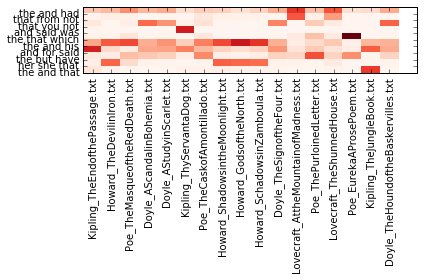

In [13]:
heatmap = visual.doc_topic_heatmap(doc_topic)
heatmap.show()

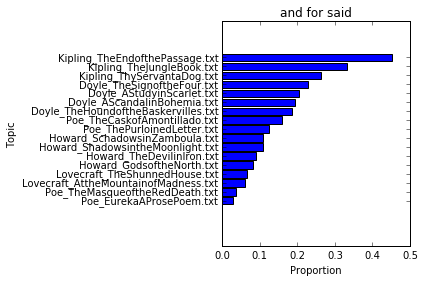

In [14]:
visual.plot_doc_topics(doc_topic, 6)